<h1 align="center"> Support Vector Machines</h1>

#### Intro

SVMs are a powerful class of supervised learning algorithms for classification and regression problems. In the context of classification, SVMs can be viewed as maximum margin linear classifiers. 

The SVM uses an objective which explicitly encourages low out-of-sample error (good generalization performance). The $D$ dimensional data are divided into classes by maximizing the margin between the hyperplanes for the classes.

Note that we assume the two classes in the data are linearly separable. Later, for non-linear boundaries, we will use the kernel trick to exploit higher (possibly infinite) dimensional $z$-spaces, where the classes are linearly separable, find the support vectors in this space and map it back to the dimensionality of our problem.

#### How it Works ?

The objective of SVM is to draw a line that best separates the two classes of data points.

SVM generates a line that can cleanly separate the two classes. How clean, you may ask. There are many possible ways of drawing a line that separates the two classes, however, in SVM, it is determined by the margins and the support vectors.

The margin is the area separating the two dotted green lines as shown in the image above. The more the margin the better the classes are separated. The support vectors are the data points through which each of the green lines passes through. These points are called support vectors as they contribute to the margins and hence the classifier itself. These support vectors are simply the data points lying closest to the border of either of the classes which has a probability of being in either one.

It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

**Support Vectors**<br>
Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

**Hyperplane**<br>
A hyperplane is a decision plane which separates between a set of objects having different class memberships.

**Margin**<br>
A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.


<img src="SVM.png">

##### Import

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets,metrics

##### Making Dataframe

In [6]:
# Making Pandas Datframe from sklearn Dataset

cancer_Data=datasets.load_breast_cancer()
Features_df = pd.DataFrame(cancer_Data.data, columns=cancer_Data.feature_names)
pd.set_option('display.max_columns',85)
Features_df.head()

target_Series=pd.Series(data=cancer_Data.target,name="Target")  #converting numpy ndarray into Series
target_Series
df=Features_df.merge(target_Series,on=Features_df.index,how="inner")
df=df.drop(columns=["key_0"],axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


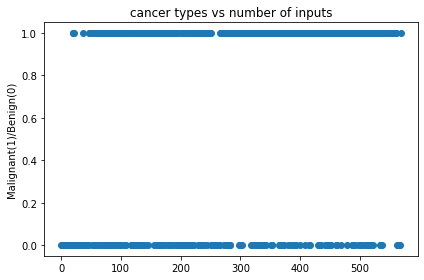

In [7]:
import matplotlib.pyplot as plt 
x=df.index
y=df.Target
plt.ylabel("Malignant(1)/Benign(0)")
plt.scatter(x,y)
plt.title("cancer types vs number of inputs")
plt.tight_layout()

The linear classifiers we know will draw a straight line between the classes. With this example, we could do this by hand. But what should strike you is that there is more than one decision boundary (lines) that can achieve minimum in-sample error. Let's plot them below.

#### Feature and Target Vectors

In [8]:
x=Features_df                                             # Feature Vectors
y=target_Series                                           # Target Vectors

#### Standardization 

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
#print('First column Before scaling :',x[0:1])
print('First column After Scaling  :',x_scaled[0:1])

First column After Scaling  : [[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
   2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
   2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
   1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
   1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]]


### 1.0 SVM classifier with Linear kernel

##### With Standardization

In [10]:
# Imports
from sklearn import svm
from sklearn.model_selection import train_test_split

In [11]:
# Splitting
X_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=1,stratify=y)

In [12]:
# Using SVM on Training dataset
classifier1=svm.SVC(kernel='linear')
classifier1.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
# Prediction on Test dataset
y_predict=classifier1.predict(x_test)

print('Model Accuracy With Standardization',metrics.accuracy_score(y_test,y_predict)*100,'%')
print('Model Precision With Standardization',metrics.precision_score(y_test,y_predict)*100,'%')
print('Model Recall With Standardization',metrics.recall_score(y_test,y_predict)*100,'%')

Model Accuracy With Standardization 99.12280701754386 %
Model Precision With Standardization 98.63013698630137 %
Model Recall With Standardization 100.0 %


#### confusion matrx

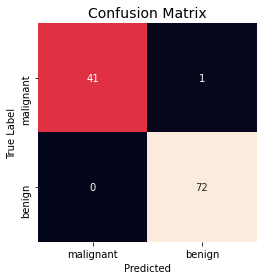

In [14]:
# With Heatmap

mat=metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(mat,square=True,annot=True,cbar=False,fmt='d',
            xticklabels=cancer_Data.target_names,yticklabels=cancer_Data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title("Confusion Matrix",fontsize=14)
plt.tight_layout()

In [15]:
# confusion matrix using crosstab
pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,41,1,42
1,0,72,72
All,41,73,114


In [16]:
# Accuracy matrix using classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.99      1.00      0.99        72

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [17]:
from sklearn import svm
X_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=1,stratify=y)
classifier1=svm.SVC(kernel='rbf',degree=1,gamma=100)
classifier1.fit(X_train,y_train)
y_predict=classifier1.predict(x_test)

print('Model Accuracy With Standardization',metrics.accuracy_score(y_test,y_predict)*100,'%')
print('Model Precision With Standardization',metrics.precision_score(y_test,y_predict)*100,'%')
print('Model Recall With Standardization',metrics.recall_score(y_test,y_predict)*100,'%')

Model Accuracy With Standardization 63.1578947368421 %
Model Precision With Standardization 63.1578947368421 %
Model Recall With Standardization 100.0 %


##### Without Standardization

In [18]:
from sklearn import svm
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)
classifier1=svm.SVC(kernel='linear')
classifier1.fit(X_train,y_train)
y_predict=classifier1.predict(x_test)

print('Model Accuracy Without Standardization',metrics.accuracy_score(y_test,y_predict)*100,'%')
print('Model Precision Without Standardization',metrics.precision_score(y_test,y_predict)*100,'%')
print('Model Recall Without Standardization',metrics.recall_score(y_test,y_predict)*100,'%')

Model Accuracy Without Standardization 96.49122807017544 %
Model Precision Without Standardization 95.94594594594594 %
Model Recall Without Standardization 98.61111111111111 %


### 2.0 SVM with Polynomial kernel 

In [19]:
from sklearn import svm
X_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=1,stratify=y)
classifier1=svm.SVC(kernel='poly',degree=1,gamma=100)
classifier1.fit(X_train,y_train)
y_predict=classifier1.predict(x_test)

print('Model Accuracy With Standardization',metrics.accuracy_score(y_test,y_predict)*100,'%')
print('Model Precision With Standardization',metrics.precision_score(y_test,y_predict)*100,'%')
print('Model Recall With Standardization',metrics.recall_score(y_test,y_predict)*100,'%')

Model Accuracy With Standardization 99.12280701754386 %
Model Precision With Standardization 100.0 %
Model Recall With Standardization 98.61111111111111 %


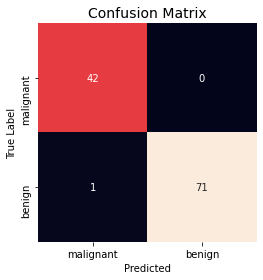

In [20]:
mat=metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(mat,square=True,annot=True,cbar=False,fmt='d',
            xticklabels=cancer_Data.target_names,yticklabels=cancer_Data.target_names)
plt.title("Confusion Matrix",fontsize=14)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.tight_layout()


### Tuning Hyperparameters:<br>

**Kernel:**<br>
The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. Polynomial and RBF kernels compute the separation line in the higher dimension. In some of the applications, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear. This transformation can lead to more accurate classifiers.<br>

**Regularization:**<br>
Regularization parameter in python's Scikit-learn C parameter used to maintain regularization. Here C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.<br>


**Gamma:**<br>
A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line.

### Avantages and Disadvantages:

**Advantages**<br>
SVM Classifiers offer good accuracy and perform faster prediction compared to Naïve Bayes algorithm. They also use less memory because they use a subset of training points in the decision phase. SVM works well with a clear margin of separation and with high dimensional space.

**Disadvantages**<br>
SVM is not suitable for large datasets because of its high training time and it also takes more time in training compared to Naïve Bayes. It works poorly with overlapping classes and is also sensitive to the type of kernel used.